In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble, preprocessing, tree
print('pandas =', pd.__version__)
print('numpy =', np.__version__)


# Read data and preprocessing
# X = pd.read_csv('./JNSM_VoD_flashcrowd_2/X.csv').drop(columns=['TimeStamp','Unnamed: 0'])
# y = pd.read_csv('./JNSM_VoD_flashcrowd_2/Y.csv')['DispFrames']
# select = np.load('select_VoD.npy')

X = pd.read_csv('./JNSM_KV_flashcrowd_2/X.csv').drop(columns=['TimeStamp','Unnamed: 0'])
y = pd.read_csv('./JNSM_KV_flashcrowd_2/Y.csv')['ReadsAvg']
select = np.load('select_KV.npy')

X = preprocessing.scale(X, axis=0)

pandas = 1.4.4
numpy = 1.23.4


In [32]:
# out-lier removal
T = 69 #for KV  ## 56 for VoD
X_cut = X[(np.abs(X) < T).all(axis=1)]
y_cut = y[(np.abs(X) < T).all(axis=1)]
num = X.shape[0] - X_cut.shape[0]
print('Removed outliers: ', num)

Removed outliers:  91


In [33]:
# our evaluating metric: Normalized Mean Absolute Error
def NMAE(y_true, y_pred):
    return abs(y_true - y_pred).mean() / abs(y_pred).mean()

In [34]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cut[:,select], y_cut, test_size=0.3)

In [35]:
# KV
from sklearn.preprocessing import minmax_scale
bin_size = (y_train.max() - y_train.min()) / 20
bin = np.linspace(y_train.min()+bin_size, y_train.max()-bin_size, num=20)
y_labeled = minmax_scale(y_train, (0,19)).astype(int)  # map to classlabels
# 
regr = ensemble.RandomForestClassifier(n_jobs=-1)
regr.fit(X_train, y_labeled)
y_pred = regr.predict(X_test)
y_pred = bin[y_pred] # convert back to real number
NMAE(y_test, y_pred)

0.024166997766064326

In [8]:
#VoD
regr = ensemble.RandomForestClassifier(n_jobs=-1)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
NMAE(y_test, y_pred)

0.038449441067709436

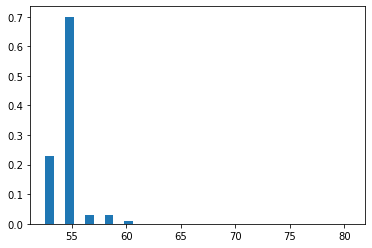

In [38]:
# KV
import matplotlib.pyplot as plt
h = regr.predict_proba(X_test[1000,:].reshape(1, -1))
plt.bar(bin[:16], h.squeeze())
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (30,) and arg 1 with shape (16,).

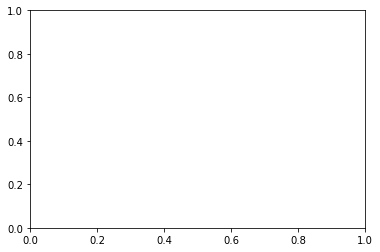

In [37]:
# VoD
import matplotlib.pyplot as plt
h = regr.predict_proba(X_test[1000,:].reshape(1, -1))
plt.bar(np.arange(0,26), h.squeeze())
# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 56), yticks=np.linspace(0, 56, 9))
plt.show()

In [41]:
y_test.iloc[1000]

53.8602